# Check reprojection error of the data

In [44]:
%load_ext autoreload
%autoreload 2
from load import *
import torch
import yaml
import logging
from imp import reload
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from liftpose.vision_3d import reprojection_error, world_to_camera, project_to_camera
from liftpose.plot import plot_pose_3d, plot_pose_2d
reload(logging)
logger = logging.getLogger(__name__).setLevel(logging.INFO)

# decleare data parameters
par_train = {'data_dir' : '/data/LiftPose3D_2602/fly_tether/data_DF3D', # change the path 
             'out_dir'        : './out',
             'train_subjects' : [1],
             'test_subjects'  : [6,7],
             'actions'        : ['all'],
             'cam_id'         : [0,1,2,4,5,6]}

# merge with training parameters
par_data = yaml.full_load(open('param.yaml', "rb"))
par = {**par_data["data"], **par_train}

# Load 2D data
train_2d = load_2D(
    par["data_dir"],
    par,
    cam_id=par["cam_id"],
    subjects=par["train_subjects"],
    actions=par["actions"],
)
test_2d = load_2D(
    par["data_dir"],
    par,
    cam_id=par["cam_id"],
    subjects=par["test_subjects"],
    actions=par["actions"],
)

# Load 3D data
train_3d, _, rcams_train = load_3D(
    par["data_dir"],
    par,
    cam_id=par["cam_id"],
    subjects=par["train_subjects"],
    actions=par["actions"],
)
test_3d, _, rcams_test = load_3D(
    par["data_dir"],
    par,
    cam_id=par["cam_id"],
    subjects=par["test_subjects"],
    actions=par["actions"],
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
k = list(train_3d)[1]
print(k)
cam_id = 6
k = k_2d = (k[0], k[1], k[2].replace('cam_1', f'cam_{cam_id}'))
print(k)
cam =  rcams_train[k]
proj = reprojection_error(train_3d[k], train_2d[k], cam['R'], cam['tvec'], cam['intr'])[:, 19:19+15]
np.mean(proj)

(1, 'all', 'pose_result_fix__data_paper_180919_MDN_CsCh_Fly4_003_SG1_behData_images.cam_1')
(1, 'all', 'pose_result_fix__data_paper_180919_MDN_CsCh_Fly4_003_SG1_behData_images.cam_6')


3.6184514406891877

In [40]:
proj[0]

array([643.11428635, 627.02514164, 717.62605935, 670.65599793,
       700.70110374, 590.46608159, 605.00717833, 612.09945042,
       652.02306224, 703.54919782, 573.12595605, 579.65582296,
       601.30204795, 611.27601278, 655.89579708])

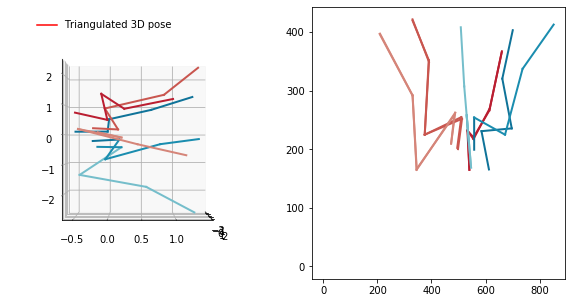

In [32]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection="3d")
ax.view_init(elev=0, azim=0)
ax_2d = fig.add_subplot(122)


frame = 500

pts3d_rot = train_3d[k]
pts3d_rot = world_to_camera(pts3d_rot, cam['R'], cam['tvec'])
pts3d_proj = project_to_camera(pts3d_rot,cam['intr'])
ptssh = train_2d[k][frame]

plot_pose_3d(
    ax,
    pts3d_rot[frame],
    normalize=True,
    pred=None,
    bones=par_data["vis"]["bones"], 
    limb_id=par_data["vis"]["limb_id"], 
    colors=par_data["vis"]["colors"]
)

plot_pose_2d(
    ax_2d,
    ptssh,
    normalize=False,
    bones=par_data["vis"]["bones"], 
    limb_id=par_data["vis"]["limb_id"], 
    colors=par_data["vis"]["colors"]
)


plot_pose_2d(
    ax_2d,
    pts3d_proj[frame],
    normalize=False,
    bones=par_data["vis"]["bones"], 
    limb_id=par_data["vis"]["limb_id"], 
    colors=par_data["vis"]["colors"]
) 
